# Solutions to Modern Data Science Problems

# probelms till 15.02 + 20.02 + problem 33 (Optional)

by *Mateusz Kmieć* 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import urllib.request
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import norm, expon, chi2, uniform
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 33. (Optional)

Gauss-Markov theorem

Show that the ordinary least squares estimator has the lowest variance among all
unbiased linear estimators (is an “efficient” estimator) under the assumptions that:

- Its errors have zero expectation values
- its variances are equal.
- errors are uncorrelated

### Problem 51. (Optional)

Implement the gradient descent algorithm for linear regression:
start with some initial $\left(\theta_{1}, \theta_{0} \right)$ for every iteration:

$$\theta_{k+1} = \theta_{k} - \alpha \cdot \frac{\partial E(\theta_{k})}{\partial \theta}.$$,

where $k=0,1$, $\alpha$ – learning rate

Test your implementation with some data (e.g. x03.csv) and compare with analytical
solution:

- plot $E(\theta_{k})$ vs iteration
- plot $\theta_{k}$ vs iteration 

In [160]:
#Please note 'raw' prefix in the url and the lack of 'blob' part
url='https://raw.github.com/wkrzemien/dataScienceAndML2020/master/datasets/x08.csv'
urllib.request.urlretrieve(url,'x08.csv')

FILE_NAME = 'x08.csv'

data = pd.read_csv(FILE_NAME, names=['index','inhabitants','incomeBelow5k','unemployed','murders'])

data.head()


,index,inhabitants,incomeBelow5k,unemployed,murders
0,1,587000,16.5,6.2,11.2
1,2,643000,20.5,6.4,13.4
2,3,635000,26.3,9.3,40.7
3,4,692000,16.5,5.3,5.3
4,5,1248000,19.2,7.3,24.8


In [161]:
def loadData(filename):
    columns = ['index','inhabitants','incomeBelow5k','unemployed','murders']
    data = pd.read_csv(filename, names=columns)
    
    fraction = 0.75
    trainingSet=data.sample(frac=fraction)
    testSet=data.drop(trainingSet.index)
    
    dataset1 = trainingSet['inhabitants']
    dataset2 = trainingSet['incomeBelow5k']
    dataset3 = trainingSet['unemployed']
    dataset4 = trainingSet['murders']
    
    testset1 = testSet['inhabitants']
    testset2 = testSet['incomeBelow5k']
    testset3 = testSet['unemployed']
    testset4 = testSet['murders']
    
    
    return columns[1:4], [dataset1, dataset2, dataset3], dataset4, [testset1, testset2, testset3], testset4

In [162]:
class MySimpleLinearRegression():
    def __init__(self):
        self._theta = [0, 0]
        self._error = 0
    
    #calculation of linear fit parameters gradient descent
    def fit_grad_descent(self, X, Y):
        
        size=len(X)
        x=np.array(X).reshape(-1, 1).reshape(size,1)
        y = np.array(Y).reshape(-1, 1).reshape(size,1) 

        #data normalisation for fit
        min_x, max_x = np.min(x), np.max(x)
        min_y, max_y = np.min(y), np.max(y)
        
        x=(x-min_x)/(max_x-min_x)
        y=(y-min_y)/(max_y-min_y)
        
        b_current=0
        m_current=0
        
        learning_rate=0.0001
        epochs=100000

        for i in range(epochs):
            y_current = (m_current * x) + b_current
            
            m_gradient = -2*np.sum(x * (y - y_current))
            b_gradient = -2*np.sum(y - y_current)
            
            m_current = m_current - (learning_rate * m_gradient)
            b_current = b_current - (learning_rate * b_gradient)
        
        #we de-normalise the results for printing
        m=m_current*(max_y-min_y)/(max_x-min_x)
        b=b_current*(max_y-min_y)+min_y-m*min_x
            
        self._theta = [b, m]

        return self._theta 
            
    def fit_closed_form(self, X, Y):
        
        size=len(X)
        xx=np.array(X).reshape(-1, 1).reshape(size,1)        
        min_x, max_x = np.min(xx), np.max(xx) #data normalisation
        xx=(xx-min_x)/(max_x-min_x)
        x = np.asmatrix(np.c_[np.ones((size,1)),xx])
        
        y = np.array(Y).reshape(-1, 1).reshape(size,1) 
        min_y, max_y = np.min(y), np.max(y) #data normalisation
        y=(y-min_y)/(max_y-min_y)
        
       
        #calculation of parameters, closed form solution, linear regression OLS.
        theta = np.linalg.inv(x.T@x)@x.T@y 
        
        b=theta.item(0)
        m=theta.item(1)
        
        #data de-normalisation for printing
        m=m*(max_y-min_y)/(max_x-min_x)
        b=b*(max_y-min_y)+min_y-m*min_x
        
        self._theta = [b,m] 
        
        return self._theta      

    def getParams(self):
        return self._theta

    def predict(self, x):         
        return self._theta[1]*x+self._theta[0] 
    
    def getError(self, X, Y):
        size=len(X)
        xx=np.array(X).reshape(-1, 1).reshape(size,1)
        x = np.asmatrix(np.c_[np.ones((size,1)),xx])
        y = np.array(Y).reshape(-1, 1).reshape(size,1)  
        theta=np.matrix([[self._theta[0]],[self._theta[1]]])        
        error=(((x@theta-y).T)@(x@theta-y))*(1/y.shape[0])
        self._error = error[0,0]
        return self._error
print("done")

done


In [163]:
def plotData_closed_form(data1, data2, test1, test2, names): 
    
    #model fitting
    model = MySimpleLinearRegression()
    model.fit_closed_form(data1, data2)
    print("Parameters [intercept, slope] = ",model.getParams(),",")
    yPredicted = [model.predict(x) for x in data1]
        
    #Training error"
    print("Training error = {:.4f}".format(model.getError(data1,data2)))
      
    #Test error
    yPredicted_test = [model.predict(x) for x in test1]
    print("Test error = {:.4f}".format(model.getError(test1,test2)))
    
    #plot the best line and data
    plt.scatter(data1, data2)
    plt.plot(data1, yPredicted)  
    plt.xlabel(names)
    plt.ylabel('murder')
    plt.show()
    
print("done")

done


In [164]:
def plotData_grad_descent(data1, data2, test1, test2, names):
    
    #model fitting
    model = MySimpleLinearRegression()
    model.fit_grad_descent(data1, data2)
    print("Parameters [intercept, slope] = ",model.getParams(),",")
    yPredicted = [model.predict(x) for x in data1]
        
    #Training error
    print("Training error = {:.4f}".format(model.getError(data1,data2)))
      
    #Test error
    yPredicted_test = [model.predict(x) for x in test1]
    print("Test error = {:.4f}".format(model.getError(test1,test2)))
    
    #plot the best line and data
    plt.scatter(data1, data2)
    plt.plot(data1, yPredicted)  
    plt.xlabel(names)
    plt.ylabel('murder')
    plt.show()
    
print("done")

done


In [165]:
def plotData_sklearn(data1, data2, test1, test2, names):
    
    #formatting data
    data1 = np.array(data1).reshape(-1, 1).reshape(len(data1),1)
    data2 = np.array(data2).reshape(-1, 1).reshape(len(data2),1)   
    test1 = np.array(test1).reshape(-1, 1).reshape(len(test1),1)
    test2 = np.array(test2).reshape(-1, 1).reshape(len(test2),1)
  
    #data normalisation for fit
    min_x, max_x = np.min(data1), np.max(data1)
    min_y, max_y = np.min(data2), np.max(data2)
        
    data11=(data1-min_x)/(max_x-min_x)
    data22=(data2-min_y)/(max_y-min_y)

    #model fitting
    model = LinearRegression().fit(np.array(data11), np.array(data22))
    
    b=model.intercept_[0]
    m=model.coef_[0,0]
    
    #data de-normalisation for printing
    m=m*(max_y-min_y)/(max_x-min_x)
    b=b*(max_y-min_y)+min_y-m*min_x

    print("Parameters [intercept, slope] = ","[", b, m,"],")
    ypred = m*data1+b
        
    #Training error
    print("Training error = {:.4f}".format(mean_squared_error(data2, ypred)))
      
    #Test error
    ytest = m*test1+b
    print("Test error = {:.4f}".format(mean_squared_error(test2,ytest)))
    
    #plot the best line and data
    plt.scatter(data1, data2)
    plt.plot(data1, ypred)  
    plt.xlabel(names)
    plt.ylabel('murder')
    plt.show()
    
print("done")

done


RESULTS FOR MySimpleLinearRegression()
--------------------------------------

Parameters [intercept, slope] =  [21.4500518487253, 2.012636414790284e-06] ,
Training error = 80.0753
Test error = 249.4488


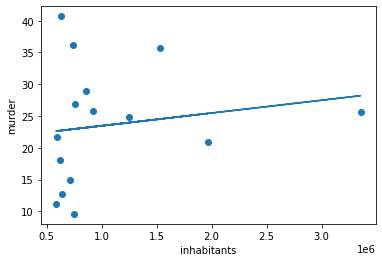

Parameters [intercept, slope] =  [-22.697441552044225, 2.2912924860747967] ,
Training error = 20.5979
Test error = 65.1472


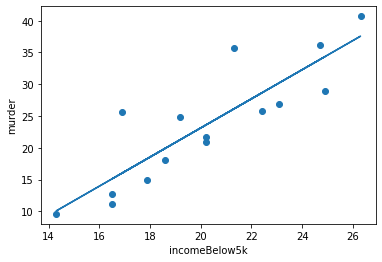

Parameters [intercept, slope] =  [-28.970923362592863, 7.147451046590144] ,
Training error = 28.3756
Test error = 8.4220


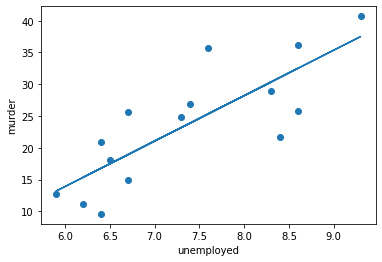

In [166]:
print("RESULTS FOR MySimpleLinearRegression()")
print("--------------------------------------\n")

names, datas, murder, test_sets, test_murder = loadData(FILE_NAME)
for i,d in enumerate(datas):
    plotData_closed_form(d.tolist(), murder.tolist(), test_sets[i].tolist(), test_murder.tolist(), names[i])

RESULTS FOR LinearRegression() from sklearn
--------------------------------------

Parameters [intercept, slope] =  [ 21.450051848725302 2.0126364147902836e-06 ],
Training error = 80.0753
Test error = 249.4488


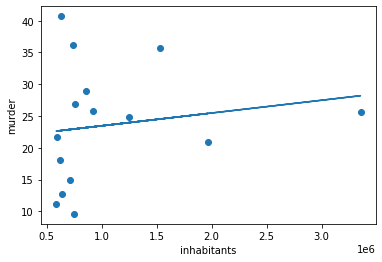

Parameters [intercept, slope] =  [ -22.69744155204426 2.2912924860747985 ],
Training error = 20.5979
Test error = 65.1472


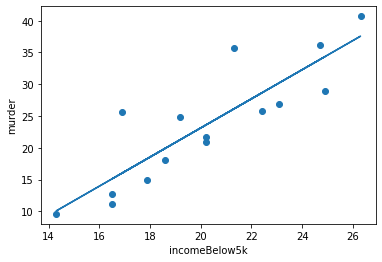

Parameters [intercept, slope] =  [ -28.97092336259283 7.14745104659014 ],
Training error = 28.3756
Test error = 8.4220


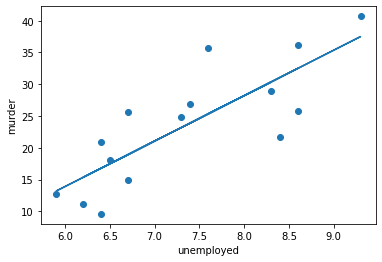

In [167]:
print("RESULTS FOR LinearRegression() from sklearn")
print("--------------------------------------\n")

#names, datas, murder, test_sets, test_murder = loadData(FILE_NAME)
for i,d in enumerate(datas):
    plotData_sklearn(d.tolist(), murder.tolist(), test_sets[i].tolist(), test_murder.tolist(), names[i])

RESULTS FOR MySimpleLinearRegression()
--------------------------------------

Parameters [intercept, slope] =  [19.32354850598734, 2.799922841748477e-06] ,
Training error = 94.6891
Test error = 228.0820


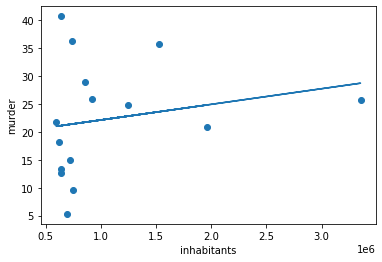

Parameters [intercept, slope] =  [-26.69626298067207, 2.4462181917142094] ,
Training error = 32.0661
Test error = 17.4741


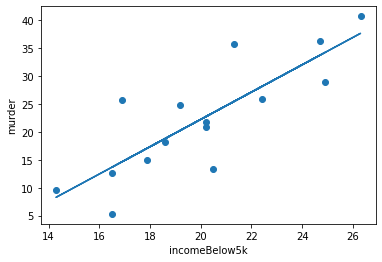

Parameters [intercept, slope] =  [-31.216717042631913, 7.404527266439441] ,
Training error = 28.0309
Test error = 10.7741


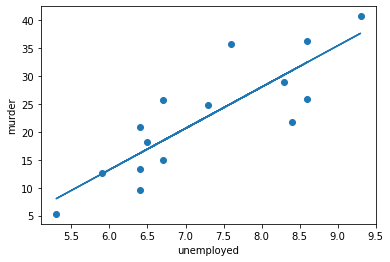

In [169]:
print("RESULTS FOR MySimpleLinearRegression()")
print("--------------------------------------\n")

names, datas, murder, test_sets, test_murder = loadData(FILE_NAME)
for i,d in enumerate(datas):
    plotData_grad_descent(d.tolist(), murder.tolist(), test_sets[i].tolist(), test_murder.tolist(), names[i])

### Probelm 52. (Optional)

Implement the Newton method and test your implementation on data from x03.csv. Once you do it you shall compare it with the analytical
solution:

- plot $E(\theta_{k})$ vs iteration

- plot $\theta_{k}$ vs iteration 

Since Hessian for linear function $\Sigma_{i=0}^{N} (y-mx-b)^{2}$ has no inverse I cannot use the Newton method for the linear model optimisation. That is why I am going to use a different set of data. I will try to fit a quadratic function to age vs blood_pressure dataset.

In [245]:
class MySimpleNewtonRegression():
    def __init__(self):
        self._theta = 0
        self._error = 0
            
    def fit_newton(self, X, Y):

        size=len(X)
        x = np.array(X).reshape(-1, 1).reshape(size,1)
        y = np.array(Y).reshape(-1, 1).reshape(size,1)      
     
        m_current=0
        
        learning_rate=1
        epochs=100
        for i in range(epochs):

            m_gradient = -(2/y.shape[0])*np.sum(x*x*(y-m_current*m_current*x*x-10)*(2*m_current*x*x))
            if(i==1):
                print(m_gradient)
            #error=(y-y_current).T@(y-y_current)*(1/y.shape[0])
            m_current = m_current - learning_rate*(m_gradient/np.sum(12*m_current*m_current*x*x*x*x))
            if(i==1):
                print(m_current)

        self._theta = m_current

        return self._theta      

    def getParams(self):
        return self._theta

    def predict(self, x):         
        return self._theta*self._theta*np.sum(x*x) + 10
    
    def getError(self, X, Y):
        size=len(X)
        x=np.array(X).reshape(-1, 1).reshape(size,1)
        y = np.array(Y).reshape(-1, 1).reshape(size,1)  
        y_current=self._theta*self._theta*x*x+self._theta  
        error=(y-y_current).T*(y-y_current)*(1/y.shape[0])
        self._error = 0
        return self._error
print("done")

done


In [205]:
#Please note 'raw' prefix in the url and the lack of 'blob' part
url='https://raw.github.com/wkrzemien/dataScienceAndML2020/master/datasets/x03.csv'
urllib.request.urlretrieve(url,'x03.csv')

FILE_NAME = 'x03.csv'

data=pd.read_csv(FILE_NAME)

data.head(5)

,index,one,age,blood_pressure
0,1,1,39,144
1,2,1,47,220
2,3,1,45,138
3,4,1,47,145
4,5,1,65,162


In [206]:
def load_NEWTON_Data(filename):
    data = pd.read_csv(filename)
    
    fraction = 0.75
    trainingSet=data.sample(frac=fraction)
    testSet=data.drop(trainingSet.index)
    
    dataset1 = trainingSet['age']
    dataset2 = trainingSet['blood_pressure']
    
    testset1 = testSet['age']
    testset2 = testSet['blood_pressure']

    return dataset1, dataset2, testset1, testset2

In [249]:
def plotData_newton(data1, data2, test1, test2):
    
    #data normalisation for fit
    min_x, max_x = np.min(data1), np.max(data1)
    min_y, max_y = np.min(data2), np.max(data2)
        
    data1=(data1-min_x)/(max_x-min_x)
    data2=(data2-min_y)/(max_y-min_y)
    
    #model fitting
    model = MySimpleNewtonRegression()
    model.fit_newton(data1, data2)
    print("Parameter m = ", model.getParams(),",")
    yPredicted = [model.predict(x) for x in data1]
        
    #Training error
    print("Training error = {:.4f}".format(model.getError(data1,data2)))
      
    #Test error
    yPredicted_test = [model.predict(x) for x in test1]
    print("Test error = {:.4f}".format(model.getError(test1,test2)))
    
    #plot the best line and data
    plt.scatter(data1, data2)
    plt.plot(data1, yPredicted)  
    plt.xlabel('age')
    plt.ylabel('blood_pressure')
    plt.show()
    
print("done")

done


In [ ]:
print("RESULTS FOR MySimpleLinearRegression()")
print("--------------------------------------\n")

dataset1, dataset2, testset1, testset2 = load_NEWTON_Data(FILE_NAME)

plotData_newton(dataset1, dataset2, testset1, testset2)

### Problem 60. (Optional)

Implement your version of Naive Bayes classifier that reads the training
sample in csv format. For simplicity you can assume that the input contains only two
classes.

### Problem 61.

Assuming the 1-D box kernel with the width w=2 and the following set of data 
$x_{i} = [1,2.5, 3,3.5,4,6,6.5,7,9]$, use KDE method to estimate pdf for points:
    
- f(0.5)
- f(4)
- f(10)

#### In this problem I didn't normalise distribution as I wanted to have integer values of f(argument) !!!!

f(0.5) = 1
f(4) = 2
f(10) = 0


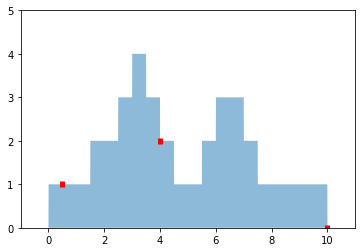

In [122]:
argument=[0.5, 4, 10] #We are calculating f(argument)

bin_width=2
x=[1, 2.5, 3, 3.5, 4, 6, 6.5, 7, 9]

def Kernel(xi, xx, bin_width):
    return (abs(xi - xx)<0.5*bin_width)

xx = np.linspace(0, 10, 2000)
density = sum(Kernel(xi,xx, bin_width) for xi in x)
    
#f(0.5)
min_xx0=np.argmin(np.abs(np.array(xx)-argument[0]))
print("f(0.5) = {}".format(density[min_xx0]))

#f(4)
min_xx1=np.argmin(np.abs(np.array(xx)-argument[1]))
print("f(4) = {}".format(density[min_xx1]))

#f(10)
min_xx2=np.argmin(np.abs(np.array(xx)-argument[2]))
print("f(10) = {}".format(density[min_xx2]))


plt.fill_between(xx, density, alpha=0.5)

#f(argument) values are marked with red rectangles
plt.plot(0.5, np.full_like(0.5, density[min_xx0]), '|r', markeredgewidth=5)
plt.plot(4, np.full_like(4, density[min_xx1]), '|r', markeredgewidth=5)
plt.plot(10, np.full_like(10, density[min_xx2]), '|r', markeredgewidth=5)

plt.axis([-1, 11, 0, 5]);

### Problem 62. 

Write a program that implements 1-D KDE estimation. Plot the estimated pdf for the
box kernel and the sample data. Plot the same pdf using the gaussian kernel instead.

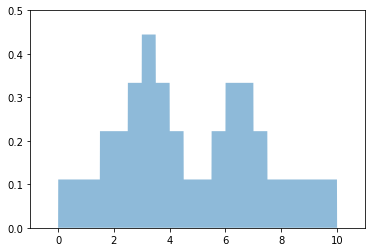

In [110]:
bin_width=2
x=[1, 2.5, 3, 3.5, 4, 6, 6.5, 7, 9]

def Kernel(xi, xx, bin_width):
    return (abs(xi - xx)<0.5*bin_width)

xx = np.linspace(0, 10, 2000)
density = sum(Kernel(xi,xx, bin_width) for xi in x)/len(x)

plt.fill_between(xx, density, alpha=0.5)


plt.axis([-1, 11, 0, 0.5]);

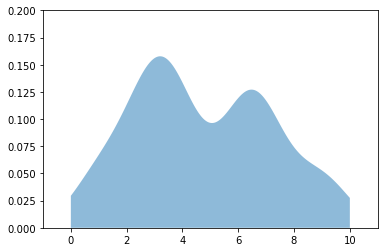

In [107]:
from scipy.stats import norm

sigma=1
x=[1, 2.5, 3, 3.5, 4, 6, 6.5, 7, 9]

def Kernel_Gaussian(xi, xx, sigma):
    return (norm(xi,sigma).pdf(xx))

xx = np.linspace(0, 10, 2000)
density = sum(Kernel_Gaussian(xi,xx, sigma) for xi in x)/len(x)

plt.fill_between(xx, density, alpha=0.5)


plt.axis([-1, 11, 0, 0.2]);

### Probelm 63.

Implement a program to calculate the integral of $f(x) =cos(x)$ and $x$ in $\left[0,\frac{\pi}{2}\right]$ using MC
integration.

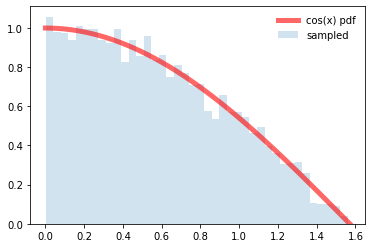

The integral that we are looking is around ~1.00.
Which can be compared with the scipy library numerical solution ~1.00.
Analytical solution of integral(cos(x),0,pi/2) = 1.00.
Luckily, we obtained a numerical solution which is congruent with the analytical solution. :)


In [69]:
sample_size=10000

def toy_dist(x):
    return np.cos(x)

x = np.linspace(0,mt.pi/2, sample_size*10)


def accept_rejection_sampling(dist, size = 1):
    naccept=0
    ymax=np.max(dist)
    samples=[]
    
    while size>0:  
        x=np.random.uniform(0,mt.pi/2)  
        y=np.random.uniform(0,ymax)   
        if y<toy_dist(x):  
            samples.append(x)  
            naccept=naccept+1  
        size=size-1;
    samples=np.array(samples)  
    
    return samples, naccept


samples, naccept = accept_rejection_sampling(toy_dist(x), size = sample_size)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='cos(x) pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = 40, label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

rectangle_area=mt.pi*0.5*1

integral=rectangle_area*(naccept/sample_size)
integral_scipy=quad(toy_dist, 0, mt.pi/2)
print("The integral that we are looking is around ~{:.2f}.".format(integral))
print("Which can be compared with the scipy library numerical solution ~{:.2f}.".format(integral_scipy[0]))
print("Analytical solution of integral(cos(x),0,pi/2) = 1.00.")
print("Luckily, we obtained a numerical solution which is congruent with the analytical solution. :)")

### Probelm 64.

Show that MC integral error decreases as $\frac{1}{\sqrt{N}}$ . 

I will present the heuristic proof of this property MC integrating algorithms based on importance sampling.

The central equation of importance sampling in 1-D is:

(1) $$\int_{a}^{b}f(x)dx \cong \frac{(b-a)}{N}\sum_{i=1}^{N} f(x_{i}) \cong (b-a)E[f(x)].$$

Let us notice that:

(2) $$\text{Var}(\text{mean})=\text{Var}\left(\frac{1}{N}\sum_{1}^{N}X_{i}\right)=\frac{1}{N^{2}}\text{Var}\left(\sum_{i=1}^{N}X_{i}\right)=\frac{1}{N^{2}}\text{Var}(X_{1}+...+X_{N})=\frac{N}{N^{2}}\text{Var(X)}=\frac{1}{N}\text{Var}\left(X\right)$$

Consequently, (1) can be written as:

(3) $$\text{Var}\left((b-a)E\left[f(x)\right]\right)=\frac{(b-a)^{2}}{N}\text{Var}\left(f(x)\right).$$

We know that the integration error can be written as:

(4) $$\text{error}=\sqrt{\text{Var}\left((b-a)E(f(x))\right)}=\frac{(b-a)}{\sqrt{N}}\sqrt{\text{Var}(f(x))}.$$

Which can be generelised for $n$-dimentsions (integration over n-dimensional space of volume $V$):

(5) $$\text{error}=\frac{V}{\sqrt{N}}\sqrt{\text{Var}(f(x))}.$$

We can see that the form of equetion (5) is independent of the number of dimensions that we are integrating over. The aforementioned property makes the MC integration insensitive to the curse of dimensionality QED.

### Problem 65.

Write a random generator using rejection sampling method for $f(x) = sin (x)$ and x in $\left[0,\frac{\pi}{2}\right]$.

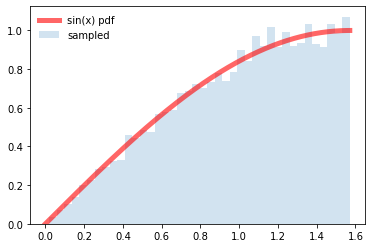

In [20]:
def toy_dist(x):
    return np.sin(x)

x = np.linspace(0,mt.pi/2,1000)


def accept_rejection_sampling(dist, size = 1):
    naccept=0
    ymax=np.max(dist)
    samples=[]
    
    while naccept<size:  
        x=np.random.uniform(0,mt.pi/2)  
        y=np.random.uniform(0,ymax)   
        if y<toy_dist(x):  
            samples.append(x)  
            naccept=naccept+1  
    samples=np.array(samples)  
    
    return samples


samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='sin(x) pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = 40, label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

### Problem 66.

Write a random generator that generates exponential distribution using inverse
sampling.

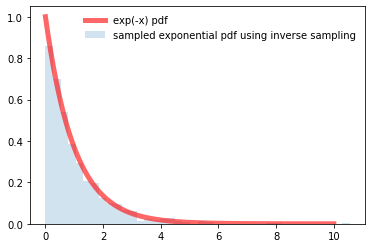

In [43]:
x = np.linspace(0, 10, 1000)

#Manually defined inverse exponential distribution cdf
def inverse_cdf_exp_dist(lamb=1.0):
    return (-1 / lamb)*mt.log(1 - np.random.random())

#manually defined exponential pdf
def exp_pdf(x, lamb):
    return lamb*np.exp(-lamb*x)

lamb=1

fig, ax = plt.subplots(1, 1)
ax.plot(x, exp_pdf(x,lamb), 'r-', lw=5, alpha=0.6, label='exp(-x) pdf')
plt.hist([inverse_cdf_exp_dist() for i in range(1000)], density=True, histtype='stepfilled', alpha=0.2, bins = 40, label = "sampled exponential pdf using inverse sampling")
ax.legend(loc='best', frameon=False)
plt.show()

### Problem 67. (Optional)

Write a generator that simulates the decay of a particle with mass M into
two photons. Let’s assume that the particle is moving in the LAB frame with some velocity
V. Plot the simulated angular distributions in the LAB and CM frames.

### Probelm 68. 

Give examples of the NN weights values that would act as OR and NOT gates.

In this problem I assume that the activation function is sigmoid function. As a result we obtain number from within the interval $\left[0,1\right]$. I assign 1 to all outputs which are greater or equal $0.5$ and 0 otherwise. 

##### OR GATE

Therefore for OR gate we have $g(\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2})=g(-1+x_{1}+x_{2})$, where $(\theta_{0}=-1,\theta_{1}=1,\theta_{2}=1)$

Naturally, we could also use other combinations of weights such as $(\theta_{0}=-1,\theta_{1}=2,\theta_{2}=2)$ or $(\theta_{0}=-7,\theta_{1}=8,\theta_{2}=8)$ and so on.

##### NOT GATE

For NOT gate we have $g(\theta_{0}x_{0}+\theta_{1}x_{1})=g(1-2x_{1})$, where $(\theta_{0}=1,\theta_{1}=-2)$.

Here there are also other possible choices of parameters for example $(\theta_{0}=1, \theta_{1}=-4)$.

If we assigned 1 to outputs less or equal to $0.5$ we could write the activation function for NOT gate as:

$g(\theta_{0}x_{0}+\theta_{1}x_{1})=g(1-x_{1})$, where $(\theta_{0}=1,\theta_{1}=-1)$.

### Problem 69.

Calculate derivatives of the activation functions and express it (if possible) by the
function itself.

On slide 44 lecture 12 the activation function was chosen to be the logistic function.

(44) $$\frac{d}{d z}S(z)=\frac{d}{d z}\left(\frac{1}{1+e^{-z}}\right)=\frac{e^{-z}}{(1+e^{-z})^{2}}=\frac{1}{1+e^{-z}}\frac{e^{-z}}{1+e^{-z}}.$$

The first factorial in (44) is $S(z)$ therefore:

(45)$$\frac{d}{d z}S(z)=S(z)\frac{-1+1+e^{-z}}{1+e^{-z}}=S(z)(1-S(z)).$$

The next prominent activation function mentioned during the lecture was $\text{RelU}(0,z) = \text{max}(0,z)$ function.

We can easily see that in this case the derivative is the following piecewise function:

$$\frac{d}{dz}\text{RelU}(z,0)=\begin{cases} 
      1 & z \geq 0 \\
      0 & z < 0.
   \end{cases}$$


This is equivallent to:

$$\frac{d}{dz}\text{RelU}(z,0)=\begin{cases} 
      \text{RelU}(1,0) & z \geq 0 \\
      \text{RelU}(-1,0) & z < 0.
\end{cases}$$


The lecturer presented $\text{tanh}(z)$ activation function. In this case we have:

$$\text{tanh}(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}},$$

$$\frac{d}{dz}\text{tanh}(z)=\frac{\left(e^{z}+e^{-z}\right)\left(e^{z}+e^{-z}\right)-\left(e^{z}-e^{-z}\right)\left(e^{z}-e^{-z}\right)}{\left(e^{z}+e^{-z}\right)^{2}}=1-\text{tanh}^{2}(z).$$

The last activation function mentioned during the lecture is the softplus function:

$$f(z)=\ln(1+\exp(z))$$

$$\frac{d}{dz}f(z)=\frac{e^{z}}{1+e^{z}}=\frac{1}{1+e^{-z}}=\text{logistic function}=S(z).$$

### Problem 70.

Calculate the backpropagation for logistic regression model.

I present a solution for a single dimensional output after forward pass but the presented reasoning can be trivially generalised for more dimensions.

$$\text{INPUT}=(x_{1},x_{2}) \rightarrow m=\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}\rightarrow S(m)\rightarrow L(S(m),y)=\text{LOSS FUNCTION},$$

where $x_{0}\equiv1$ and:

(1) $$S(m)=\frac{1}{1+e^{-\theta^{\text{T}}m}}.$$

After performing forward pass for logistic regressin with a one dimensional output $S(m)$ we can write the loss function in the form (I believe that there was a mistake in lecture 12 pg.62):

(2) $$L=-y \log(S(m))-(1-y)\log(1-S(m)),$$

Now we start backpropagation by calculating the first step influence function $\frac{dL}{dS}$:

(3) $$\frac{dL}{dS}=\frac{2S(m)y-S(m)-y}{S(m)(1-S(m))}.$$

After that we need to calculate $\frac{dS(m)}{dm}$ where formula (45) comes in handy:

(4) $$\frac{dS(m)}{dm}=S(m)(1-S(m))$$

Now we need to calculate $\frac{dm}{d\theta_{i}}$ for $i\in\{0,1,2\}$:

(5) $$\frac{dm}{d\theta_{0}}=x_{0}=1$$

(6) $$\frac{dm}{d\theta_{1}}=x_{1}$$

(7) $$\frac{dm}{d\theta_{2}}=x_{2}$$

Consequently, we end up with backpropagation formula ($i\in\{0,1,2\}$):

(8) $$\frac{dL}{d\theta_{i}}=\frac{dL}{dS}\frac{dS}{dm}\frac{dm}{d\theta_{i}}=(2S(m)-y -S(m))x_{i}$$

Having obtained gradient we can perform gradient descent for the optimisation of parameters $\theta_{i}$:

(9) $$\theta_{i}^{n+1}=\theta_{i}^{n}-\alpha\frac{dL}{d\theta_{i}},$$

$\alpha$ -  learning rate.